In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

In [4]:
df=pd.read_csv('Anomaly+-+DBScan.csv',parse_dates=True)

In [5]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

In [8]:
df['Suburb']=df['Suburb'].astype('category')
df['Address']=df['Address'].astype('category')
df['Type']=df['Type'].astype('category')
df['Method']=df['Method'].astype('category')
df['SellerG']=df['SellerG'].astype('category')
df['Date']=pd.to_datetime(df['Date'])
df['Regionname']=df['Regionname'].astype('category')
df['Propertycount']=df['Propertycount'].astype('category')
df['CouncilArea']=df['CouncilArea'].astype('category')

/tmp/ipykernel_10840/132713004.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


In [10]:
df.dtypes

Suburb                 category
Address                category
Rooms                     int64
Type                   category
Price                   float64
Method                 category
SellerG                category
Date             datetime64[ns]
Postcode                  int64
Regionname             category
Propertycount          category
Distance                float64
CouncilArea            category
dtype: object

In [14]:
df['Suburb']=df['Suburb'].cat.codes
df['Address']=df['Address'].cat.codes
df['Type']=df['Type'].cat.codes
df['Method']=df['Method'].cat.codes
df['SellerG']=df['SellerG'].cat.codes
df['Date']=pd.to_datetime(df['Date'])
df['Regionname']=df['Regionname'].cat.codes
df['Propertycount']=df['Propertycount'].cat.codes
df['CouncilArea']=df['CouncilArea'].cat.codes

In [15]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,0,42390,3,0,1490000.0,2,198,2017-01-04,3067,2,210,3.0,32
1,0,46855,3,0,1220000.0,2,255,2017-01-04,3067,2,210,3.0,32
2,0,8180,3,0,1420000.0,2,286,2017-01-04,3067,2,210,3.0,32
3,1,50133,3,0,1515000.0,2,28,2017-01-04,3040,6,90,7.5,22
4,2,57182,2,0,670000.0,2,286,2017-01-04,3042,6,185,10.4,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,295,29496,3,0,566000.0,2,344,2018-03-31,3064,2,271,20.6,11
63019,295,56375,3,0,500000.0,2,344,2018-03-31,3064,2,271,20.6,11
63020,295,43497,3,0,545000.0,2,344,2018-03-31,3064,2,271,20.6,11
63021,332,30605,3,2,NaN,0,28,2018-03-31,3074,2,310,15.3,30


In [75]:
clf=IsolationForest(n_estimators=100,max_features=1,contamination=float(.052),n_jobs=1,bootstrap=False,verbose=0,max_samples='auto')

In [82]:
clf.fit([df['Price'].fillna(df.median())])

IsolationForest(contamination=0.052, max_features=1, n_jobs=1)

In [26]:
df.drop('Date',axis=1,inplace=True)

In [81]:
[df['Price'].fillna(df.median())]

[0        1490000.0
 1        1220000.0
 2        1420000.0
 3        1515000.0
 4         670000.0
            ...    
 63018     566000.0
 63019     500000.0
 63020     545000.0
 63021     830000.0
 63022     830000.0
 Name: Price, Length: 63023, dtype: float64]

In [83]:
pred=clf.predict([df['Price'].fillna(df.median())])

In [29]:
df.shape

(63023, 12)

In [34]:
set(pred)

{-1, 1}

In [35]:
df.fillna(df.median(),inplace=True)

In [36]:
df['anomaly']=pred

In [37]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea,anomaly
0,0,42390,3,0,1490000.0,2,198,3067,2,210,3.0,32,1
1,0,46855,3,0,1220000.0,2,255,3067,2,210,3.0,32,1
2,0,8180,3,0,1420000.0,2,286,3067,2,210,3.0,32,1
3,1,50133,3,0,1515000.0,2,28,3040,6,90,7.5,22,1
4,2,57182,2,0,670000.0,2,286,3042,6,185,10.4,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,295,29496,3,0,566000.0,2,344,3064,2,271,20.6,11,1
63019,295,56375,3,0,500000.0,2,344,3064,2,271,20.6,11,1
63020,295,43497,3,0,545000.0,2,344,3064,2,271,20.6,11,1
63021,332,30605,3,2,830000.0,0,28,3074,2,310,15.3,30,1


In [38]:
df['anomaly'].value_counts()

 1    55460
-1     7563
Name: anomaly, dtype: int64

In [45]:
outlier=df.loc[df['anomaly']==-1]
outlier_index=list(outlier.index)
print(outlier_index)

[8, 10, 50, 141, 149, 150, 151, 163, 176, 177, 186, 187, 188, 209, 210, 211, 219, 226, 259, 263, 264, 265, 266, 334, 348, 349, 373, 375, 381, 396, 397, 398, 399, 401, 422, 449, 450, 453, 457, 474, 485, 486, 528, 549, 551, 556, 560, 561, 565, 567, 572, 580, 583, 584, 588, 645, 654, 659, 661, 664, 666, 699, 700, 711, 719, 724, 744, 761, 774, 780, 782, 789, 790, 793, 796, 805, 811, 814, 816, 817, 818, 828, 831, 832, 833, 834, 836, 837, 856, 861, 874, 896, 902, 903, 918, 924, 926, 928, 929, 935, 936, 937, 938, 939, 955, 972, 973, 974, 976, 978, 979, 983, 1012, 1016, 1034, 1035, 1040, 1046, 1054, 1056, 1057, 1058, 1060, 1061, 1077, 1079, 1082, 1085, 1091, 1092, 1094, 1109, 1110, 1114, 1122, 1139, 1145, 1148, 1149, 1151, 1154, 1157, 1159, 1181, 1274, 1278, 1287, 1288, 1294, 1303, 1306, 1322, 1323, 1361, 1382, 1383, 1399, 1410, 1417, 1418, 1419, 1421, 1422, 1454, 1469, 1481, 1500, 1523, 1532, 1533, 1546, 1547, 1552, 1553, 1556, 1571, 1574, 1602, 1604, 1613, 1615, 1623, 1629, 1641, 1662, 1683,

In [43]:
outlier


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea,anomaly
8,3,545,6,0,830000.0,0,454,3021,6,106,14.0,3,-1
10,5,30903,3,2,515000.0,2,114,3020,6,117,10.5,3,-1
50,32,1766,3,2,675000.0,5,286,3081,0,40,8.8,0,-1
141,72,49901,4,0,581500.0,2,113,3201,4,312,34.9,7,-1
149,82,25901,5,0,830000.0,1,221,3756,3,0,44.2,14,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63013,148,50873,5,0,710000.0,0,454,3199,4,363,38.0,7,-1
63014,148,2951,2,2,345000.0,5,14,3199,4,363,38.0,7,-1
63015,148,31597,2,2,340000.0,5,14,3199,4,363,38.0,7,-1
63016,148,38928,2,2,347700.0,5,14,3199,4,363,38.0,7,-1


In [44]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea,anomaly
0,0,42390,3,0,1490000.0,2,198,3067,2,210,3.0,32,1
1,0,46855,3,0,1220000.0,2,255,3067,2,210,3.0,32,1
2,0,8180,3,0,1420000.0,2,286,3067,2,210,3.0,32,1
3,1,50133,3,0,1515000.0,2,28,3040,6,90,7.5,22,1
4,2,57182,2,0,670000.0,2,286,3042,6,185,10.4,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,295,29496,3,0,566000.0,2,344,3064,2,271,20.6,11,1
63019,295,56375,3,0,500000.0,2,344,3064,2,271,20.6,11,1
63020,295,43497,3,0,545000.0,2,344,3064,2,271,20.6,11,1
63021,332,30605,3,2,830000.0,0,28,3074,2,310,15.3,30,1


In [46]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [47]:
pca=PCA(n_components=3)
scaler=StandardScaler()
X=scaler.fit_transform(df)

In [50]:
X_reduce=pca.fit_transform(X)

In [51]:
X.shape

(63023, 13)

In [53]:
X_reduce.shape

(63023, 3)

In [59]:
X_reduce[:,1]

array([ 1.55858112,  1.31661783,  1.32701489, ..., -0.47907764,
       -0.76807355, -1.32862016])

In [60]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea,anomaly
0,0,42390,3,0,1490000.0,2,198,3067,2,210,3.0,32,1
1,0,46855,3,0,1220000.0,2,255,3067,2,210,3.0,32,1
2,0,8180,3,0,1420000.0,2,286,3067,2,210,3.0,32,1
3,1,50133,3,0,1515000.0,2,28,3040,6,90,7.5,22,1
4,2,57182,2,0,670000.0,2,286,3042,6,185,10.4,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,295,29496,3,0,566000.0,2,344,3064,2,271,20.6,11,1
63019,295,56375,3,0,500000.0,2,344,3064,2,271,20.6,11,1
63020,295,43497,3,0,545000.0,2,344,3064,2,271,20.6,11,1
63021,332,30605,3,2,830000.0,0,28,3074,2,310,15.3,30,1


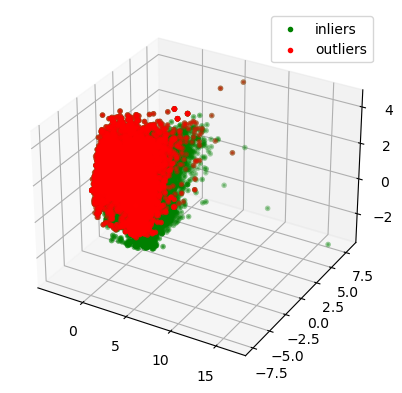

In [65]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.set_zlabel('x_composite_3')
ax.scatter(X_reduce[:,0],X_reduce[:,1],zs=X_reduce[:,2],s=4,lw=2,label="inliers",c="green")
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1],zs=X_reduce[outlier_index,2],s=4,lw=2,label="outliers",c="red")
ax.legend()
plt.show()

In [66]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea,anomaly
0,0,42390,3,0,1490000.0,2,198,3067,2,210,3.0,32,1
1,0,46855,3,0,1220000.0,2,255,3067,2,210,3.0,32,1
2,0,8180,3,0,1420000.0,2,286,3067,2,210,3.0,32,1
3,1,50133,3,0,1515000.0,2,28,3040,6,90,7.5,22,1
4,2,57182,2,0,670000.0,2,286,3042,6,185,10.4,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,295,29496,3,0,566000.0,2,344,3064,2,271,20.6,11,1
63019,295,56375,3,0,500000.0,2,344,3064,2,271,20.6,11,1
63020,295,43497,3,0,545000.0,2,344,3064,2,271,20.6,11,1
63021,332,30605,3,2,830000.0,0,28,3074,2,310,15.3,30,1


In [67]:
df.replace({"anomaly":{1:'noramal',-1:'anomaly'}})

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Postcode,Regionname,Propertycount,Distance,CouncilArea,anomaly
0,0,42390,3,0,1490000.0,2,198,3067,2,210,3.0,32,noramal
1,0,46855,3,0,1220000.0,2,255,3067,2,210,3.0,32,noramal
2,0,8180,3,0,1420000.0,2,286,3067,2,210,3.0,32,noramal
3,1,50133,3,0,1515000.0,2,28,3040,6,90,7.5,22,noramal
4,2,57182,2,0,670000.0,2,286,3042,6,185,10.4,22,noramal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,295,29496,3,0,566000.0,2,344,3064,2,271,20.6,11,noramal
63019,295,56375,3,0,500000.0,2,344,3064,2,271,20.6,11,noramal
63020,295,43497,3,0,545000.0,2,344,3064,2,271,20.6,11,noramal
63021,332,30605,3,2,830000.0,0,28,3074,2,310,15.3,30,noramal


In [68]:
clf=IsolationForest(n_estimators=100,max_features=1,contamination=float(.1),n_jobs=1,bootstrap=False,verbose=0,max_samples='auto')


In [69]:
l=[1,3,1,3,2,5,7,9,1,3,55,1,5,3,7,121,3]

In [71]:
df1=pd.DataFrame(l)

In [72]:
clf.fit(df1)

IsolationForest(contamination=0.1, max_features=1, n_jobs=1)

In [73]:
clf.predict(df1)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1])